In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/german-credit-data-with-risk/german_credit_data.csv


In [2]:
df=pd.read_csv('/kaggle/input/german-credit-data-with-risk/german_credit_data.csv')

In [3]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [6]:
#fill the nan values in both columns

In [7]:
df['Saving accounts']=df['Saving accounts'].fillna(df['Saving accounts'].mode()[0])

In [8]:
df['Checking account']=df['Checking account'].fillna(df['Checking account'].mode()[0])

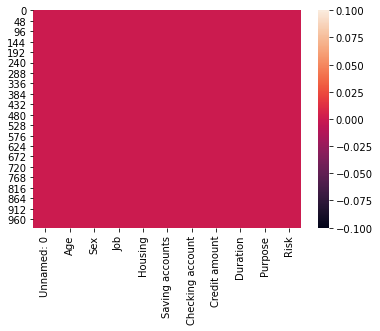

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull())

In [10]:
#now remove the unnamed column as it is unnecessary
df=df.drop(['Unnamed: 0'],axis=1)

In [11]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,little,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,little,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


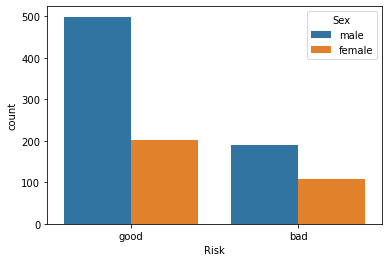

In [12]:
sns.countplot(x=df['Risk'],hue='Sex',data=df)

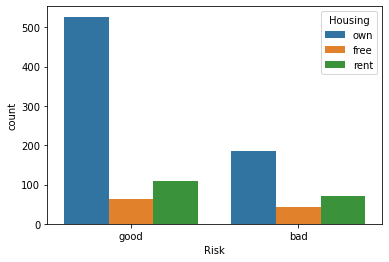

In [13]:
sns.countplot(x=df['Risk'],hue='Housing',data=df)

In [14]:
#there is  good risk at own house

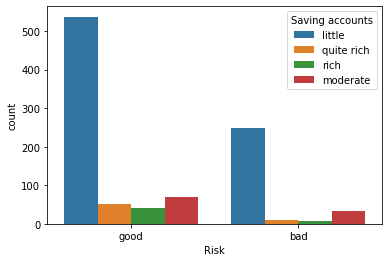

In [15]:
sns.countplot(x=df['Risk'],hue='Saving accounts',data=df)

In [16]:
#high risk at little savings

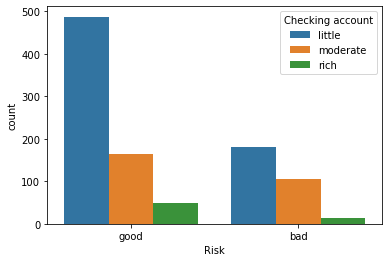

In [17]:
sns.countplot(x=df['Risk'],hue='Checking account',data=df)

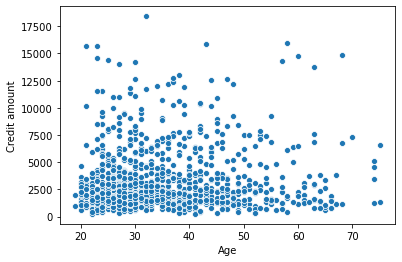

In [18]:
sns.scatterplot(x=df['Age'],y=df['Credit amount'],data=df)

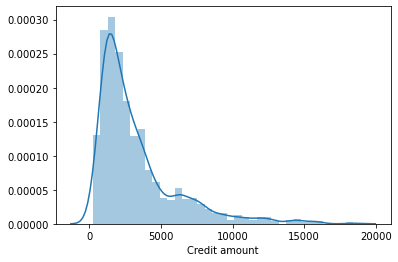

In [19]:
sns.distplot(df['Credit amount'])

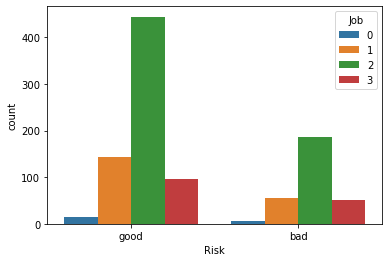

In [20]:
sns.countplot(x=df['Risk'],hue='Job',data=df)

In [21]:
#now dealing with the categorical features

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list(df.columns):
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])

In [23]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,0,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,0,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12,4,1
996,40,1,3,1,0,0,3857,30,1,1
997,38,1,2,1,0,0,804,12,5,1
998,23,1,2,0,0,0,1845,45,5,0


In [24]:
y=df['Risk']
x=df.drop(['Risk'],axis=1)

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
list_scores=[]
list_models=[]
lr=LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
pred_1=lr.predict(x_test)
score_1=accuracy_score(y_test,pred_1)
list_scores.append(score_1)
list_models.append('logistic regression')


In [27]:
score_1

0.715

In [28]:
from sklearn.neighbors import KNeighborsClassifier
list_1=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_s=knn.predict(x_test)
    scores=accuracy_score(y_test,pred_s)
    list_1.append(scores)
    

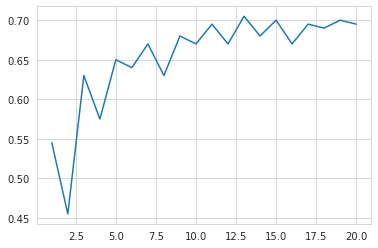

In [29]:
sns.set_style('whitegrid')
sns.lineplot(x=list(range(1,21)),y=list_1)

In [30]:
list_scores.append(max(list_1))
list_models.append('kneighbors classifier')

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_2=rfc.predict(x_test)
score_2=accuracy_score(y_test,pred_2)

In [32]:
list_scores.append(score_2)
list_models.append('random forest classifier')

In [33]:
score_2

0.69

In [34]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
pred_3=svm.predict(x_test)
score_3=accuracy_score(y_test,pred_3)
list_scores.append(score_3)
list_models.append('support vector machines')

In [35]:
score_3

0.715

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
gbr=GradientBoostingClassifier()
gbr.fit(x_train,y_train)
pred_4=gbr.predict(x_test)
score_4=accuracy_score(y_test,pred_4)
list_scores.append(score_4)
list_models.append('gradient boosting classifier')

In [37]:
score_4

0.725

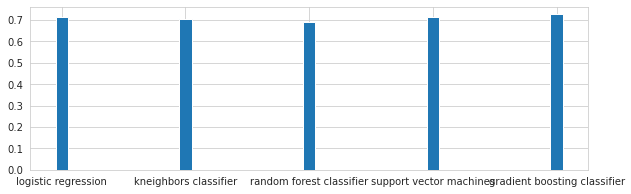

In [38]:
plt.figure(figsize=(10,3))
plt.bar(list_models,list_scores,width=0.1)
plt.show()